<a href="https://colab.research.google.com/github/Ridhi2208/Mini-Project/blob/main/ML_MINOR_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# image processing using machine learning
# logistic regression
# github,heroku
# bing
# !pip install ipython-autotime
# %load_ext autotime

In [ ]:
!pip install bing-image-downloader

In [ ]:
!mkdir images

In [ ]:
from bing_image_downloader import downloader
downloader.download("red rose",limit=30,output_dir='images',adult_filter_off=True)



[!!]Indexing page: 1

[%] Indexed 12 Images on Page 1.


[%] Downloading Image #1 from https://www.hdwallpapers.in/download/blue_flower_2-1152x864.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://ohbestdayever.com/wp-content/uploads/2018/08/chic-wine-bottle-wedding-centerpiece.jpg
[%] File Downloaded !

[%] Downloading Image #3 from http://www.movieactors.com/freezes1/IMarriedAxe16.jpg
[%] File Downloaded !

[%] Downloading Image #4 from http://www.rosesandrings.com/wp-content/uploads/2018/01/vintage-fall-gold-deep-red-and-greenery-sweetheart-table-for-wedding-reception.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://www.parfumflowercompany.com/wp-content/uploads/2016/09/3.png
[%] File Downloaded !

[%] Downloading Image #6 from https://www.parfumflowercompany.com/wp-content/uploads/2016/08/610.png
[%] File Downloaded !

[%] Downloading Image #7 from https://wallpapershome.com/images/wallpapers/polynesia-1080x1920-tourism-travel-5062.jpg
[%] File Down

In [ ]:
downloader.download("dog",limit=30,output_dir='images',adult_filter_off=True)



[!!]Indexing page: 1

[%] Indexed 12 Images on Page 1.


[%] Downloading Image #1 from http://allisonragsdalephotography.com/wp-content/uploads/2013/08/allisonragsdalephotography-3503-681x1024.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://www.frogx3.com/wp-content/uploads/2013/02/publicidad-graciosa-con-perros-15.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://www.top13.net/wp-content/uploads/2017/02/funny-kitchen-fails-13.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://s3-eu-west-1.amazonaws.com/bowwowtimes-new/wp-content/uploads/2015/09/56d7f2ab1294b5cf75ba87d2be03550d.jpg
[%] File Downloaded !

[%] Downloading Image #5 from http://img.thrfun.com/img/114/461/puppy_losing_hair_and_has_red_spots_2_l4.jpg
[%] File Downloaded !

[%] Downloading Image #6 from http://www.everythingmixed.com/wp-content/uploads/04-german-shepherds.jpg
[%] File Downloaded !

[%] Downloading Image #7 from https://ratses.gr/sites/default/files/dog_adp[1].jp

In [ ]:
downloader.download("car",limit=30,output_dir='images',adult_filter_off=True)



[!!]Indexing page: 1

[%] Indexed 12 Images on Page 1.


[%] Downloading Image #1 from http://www.awesomeinventions.com/wp-content/uploads/2015/09/command-hook-car.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://www.setaswall.com/wp-content/uploads/2018/04/Volcano-Wallpaper-1080x2280-380x802.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://i.pinimg.com/736x/57/fe/7c/57fe7cdfce56212d2f7e81a4449ba706--hava-kuvvetleri-brake-system.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://i.pinimg.com/736x/ef/9d/73/ef9d733b53cbd14be8acd899d51de479.jpg
[%] File Downloaded !

[%] Downloading Image #5 from http://coolcreativity.com/wp-content/uploads/2016/04/IMAG1930_medium2.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://oddstuffmagazine.com/wp-content/uploads/2013/09/Bio-mechanical-Tattoo-8-469x800.jpg
[%] File Downloaded !

[%] Downloading Image #7 from https://www.blissfulbrides.sg/public/kindeditor/attached/image/20170326/2017032

In [ ]:
# preprocessing

import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

target = []
images = []
flat_data = []

DATADIR = '/content/images'
CATEGORIES = ['red rose','dog','car']

for category in CATEGORIES:
  class_num = CATEGORIES.index(category)
  path = os.path.join(DATADIR,category)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    img_resized = resize(img_array,(150,150,3))   #resize, normalizes value from 0-1
    flat_data.append(img_resized.flatten())       #flattening
    images.append(img_resized)
    target.append(class_num)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)


In [ ]:
#splitting the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,test_size=0.3,random_state=109)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
              {'C': [1,10,100,1000],'kernel':['linear']},
               {'C': [1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']},
]
svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
y_pred = clf.predict(x_test)
y_pred

array([1, 1, 1, 0, 2, 1, 0, 2, 1, 1, 1, 0, 1, 2, 2, 1, 2, 2, 0, 1, 2, 2,
       0, 0, 0, 1, 2])

In [ ]:
y_test

array([1, 0, 1, 2, 2, 1, 0, 1, 1, 0, 1, 0, 1, 2, 2, 1, 2, 1, 0, 1, 2, 2,
       2, 0, 0, 0, 1])

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
accuracy_score(y_pred,y_test)

0.7037037037037037

In [ ]:
confusion_matrix(y_pred,y_test)

array([[5, 0, 2],
       [3, 8, 0],
       [0, 3, 6]])

In [ ]:
# saving the model in pickle library
import pickle
pickle.dump(clf,open('img_model.p','wb'))

In [ ]:
model = pickle.load(open('img_model.p','rb'))

Enter your URLhttps://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQuLuz9cBXOGHSw6nMzzbEeHEbK5VxZSFW0kw&usqp=CAU
(183, 276, 3)
PREDICTED OUTPUT: dog


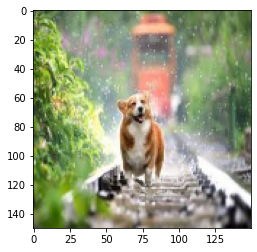

In [ ]:
# testing the model
flat_data = []
url = input('Enter your URL')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f'PREDICTED OUTPUT: {y_out}')

In [ ]:
!pip install streamlit
!pip install pyngrok
from pyngrok import ngrok

In [ ]:
%%writefile app.py
import streamlit as st
import numpy as np
import pickle
from skimage.io import imread
from skimage.transform import resize
from PIL import Image
# st.set_option('deprecation.showfileUploaderEncoding',False)
st.title('Image Classifier using Machine Learning')
st.text('Upload the image')
model = pickle.load(open('img_model.p','rb'))
uploaded_file = st.file_uploader("Choose an image..",type='jpg')
if uploaded_file is not None:
  img = Image.open(uploaded_file)
  st.image(img,caption='Uploaded Image')

  if st.button('PREDICT'):
    CATEGORIES = ['red rose','dog','car']
    st.write('Result:')
    flat_data = []
    img = np.array(img)
    img_resized = resize(img,(150,150,3))
    flat_data.append(img_resized.flatten())
    flat_data = np.array(flat_data)
    y_out = model.predict(flat_data)
    y_out = CATEGORIES[y_out[0]]
    st.title(f'PREDICTED OUTPUT: {y_out}')
    q = model.predict_proba(flat_data)
    for index,item in enumerate(CATEGORIES):
      st.write(f'{item}: {q[0][index]*100}%')

Writing app.py


In [ ]:
!nohup streamlit run app.py &
url=ngrok.connect(port='0')
url

nohup: appending output to 'nohup.out'


t=2021-04-30T09:30:55+0000 lvl=warn msg="failed to start tunnel" pg=/api/tunnels id=03b3a5fc1698eaa1 err="Your account may not run more than 2 tunnels over a single ngrok client session.\nThe tunnels already running on this session are:\n[]\n\r\n\r\nERR_NGROK_324\r\n"


PyngrokNgrokHTTPError: ignored